#Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

#Loading the Dataset

In [ ]:
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()

In [ ]:
print(dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [ ]:
#loading the dataset to pandas DataFrame
housingdf = pd.DataFrame(dataset.data, columns = dataset.feature_names)

we dont have the target  array in the data now

In [ ]:
housingdf.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


adding the target column to the dataframe

In [ ]:
housingdf["Price"] = dataset.target

Now we have the target included

In [ ]:
housingdf.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


checking the size of DataFrame

In [ ]:
housingdf.shape

(20640, 9)

#checking for missing values

In [ ]:
housingdf.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

So no Missing Values

getting the stats of the data

In [ ]:
housingdf.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


25% means that in the particular column 25% data have values less than the produced value

eg MedInc has 25% data having value less than 2.563400

Getting the correlation between the features of the dataset

#Types of Correlation:
1.Positive Correlation: if one value increases other also increases

2.Negative Correlation: if one value increases the other value  decreases

In [ ]:
correlation = housingdf.corr()

plotting the correlation using heatmap

In [ ]:
plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

#heatmap parameters
cbar: colourbar on the right

square: all values mentioned in square

fmt: float values we want here 1 value after the decimal

annot: annotation values

size: increase the size of texts

cmap: colour of the heatmap

<Axes: >

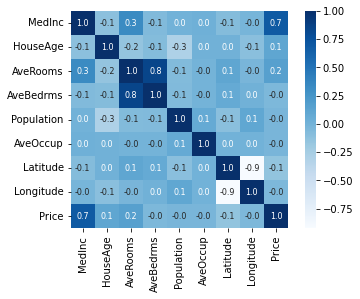

In [ ]:
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True , annot_kws = {'size':8},cmap = 'Blues')

splitting the data and target

if dropping a column axis=1
if dropping a row axis = 0

In [ ]:
X = housingdf.drop(["Price"], axis=1)
y = housingdf["Price"]

In [ ]:
print(X)


       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [ ]:
print(y)

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Price, Length: 20640, dtype: float64


#train test split

splitting the data into training data, testing data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X ,y ,test_size=0.2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


training the model

using XGBoost Regressor:
type of decission tree model
ensembel model: combining two or more models together

In [ ]:
model = XGBRegressor()

In [ ]:
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Evaluating the model
in regression problem we will find the metrics like rsquared error and mean absolute error
cannot find accuracy score in regression problem


predicting on training data

In [ ]:
#accuracy for prediction on training data
train_prediction=model.predict(X_train)

In [ ]:
print(train_prediction)

[1.5225909 3.7380865 4.611257  ... 2.030605  0.8594891 1.2285681]


comparing with original value 

using R squared error:: variance between the data

In [ ]:
score_1 = metrics.r2_score(y_train, train_prediction)

using mean absolute error:
gives mean value

In [ ]:
score_2 = metrics.mean_absolute_error(y_train, train_prediction)

Printing the values:

lesser the value more accurate the model

In [ ]:
print("R squared error : ", score_1)
print("Mean Absolute error : ", score_2)

R squared error :  0.9432530996094627
Mean Absolute error :  0.19467065309288023


the model is performing very well

Visualizing the actual Prices and prediction

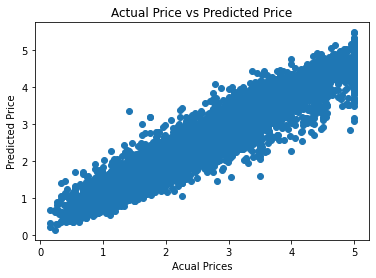

In [ ]:
plt.scatter(y_train,train_prediction)
plt.xlabel("Acual Prices")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

#Prediction for Test data

In [ ]:
test_prediction=model.predict(X_test)

In [ ]:
#R squared error
score_1 = metrics.r2_score(y_test, test_prediction)

In [ ]:
#mean absolute value
score_2 = metrics.mean_absolute_error(y_test, test_prediction)

In [ ]:
#test data
print("R squared error : ", score_1)
print("Mean Absolute error : ", score_2)

R squared error :  0.8394486653119222
Mean Absolute error :  0.3005246476472175
